In [1]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd 


In [2]:
dataset = pd.read_csv("datasets/Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X= dataset.iloc[:,[3,4]].values


In [4]:
from sklearn.cluster import KMeans


In [5]:
wcss_list = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    

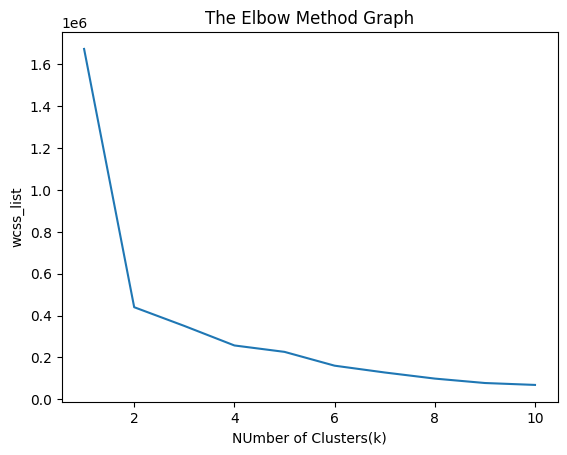

In [6]:
mtp.plot(range(1,11), wcss_list)
mtp.title("The Elbow Method Graph")
mtp.xlabel("NUmber of Clusters(k)")
mtp.ylabel("wcss_list")
mtp.show()

In [7]:
#training the kmeans model on the dataset
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
y_predict = kmeans.fit_predict(X)


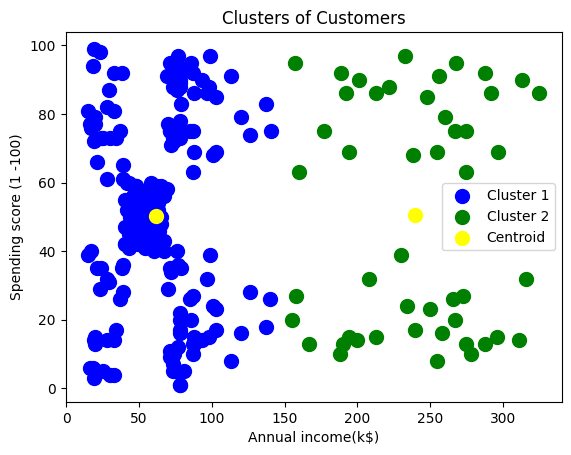

In [8]:
mtp.scatter(X[y_predict == 0,0],X[y_predict == 0,1], s = 100, c = 'blue', label = 'Cluster 1')
mtp.scatter(X[y_predict == 1,0],X[y_predict == 1,1],s = 100, c = 'green', label = 'Cluster 2')

mtp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroid')

mtp.title("Clusters of Customers")
mtp.xlabel("Annual income(k$)")
mtp.ylabel("Spending score (1 -100)")
mtp.legend()
mtp.show()
